<a href="https://colab.research.google.com/github/smlra-kjsce/Cyber-ML-DL-101/blob/master/Preprocessing_DDOS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -q /content/drive/'My Drive'/'Industry Session'/'CSV-01-12.zip'

replace 01-12/UDPLag.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 01-12/TFTP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import pandas as pd
data = pd.read_csv('/content/01-12/UDPLag.csv')
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,0,766.0,0.0,383.0,383.0,383.0,0.0,0.0,0.0,0.0,0.0,7.66E8,2000000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,574.5,383.0,0.0,-2,0,0,0,0,0,0,2,766,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,0,778.0,0.0,389.0,389.0,389.0,0.0,0.0,0.0,0.0,0.0,7.78E8,2000000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,583.5,389.0,0.0,-2,0,0,0,0,0,0,2,778,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,0,750.0,0.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,0.0,3.75E8,1000000.0,2.000000,0.000000,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,562.5,375.0,0.0,-2,0,0,0,0,0,0,2,750,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
3,24498,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,55447,192.168.50.1,5691,17,2018-12-01 13:04:45.929024,2,2,0,738.0,0.0,369.0,369.0,369.0,0.0,0.0,0.0,0.0,0.0,3.69E8,1000000.0,2.000000,0.000000,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,553.5,369.0,0.0,-2,0,0,0,0,0,0,2,738,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
4,117372,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,58794,192.168.50.1,56335,17,2018-12-01 13:04:45.929096,1,2,0,750.0,0.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,0.0,7.5E8,2000000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,562.5,375.0,0.0,-2,0,0,0,0,0,0,2,750,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370600,350624,172.16.0.5-192.168.50.1-60490-14102-6,172.16.0.5,60490,192.168.50.1,14102,6,2018-12-01 13:30:30.740273,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2000000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
370601,336856,172.16.0.5-192.168.50.1-60491-58360-6,172.16.0.5,60491,192.168.50.1,58360,6,2018-12-01 13:30:

In [0]:
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [0]:
data = data.drop(columns = ['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'SimillarHTTP', ' Bwd Packet Length Std', 'Flow Bytes/s',' Bwd Packet Length Std', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' ECE Flag Count', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward'])

In [0]:
data.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' CWE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 

In [0]:
data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,1,2,0,766.0,0.0,383.0,383.0,383.0,0.0,0.0,0.0,0.0,2000000.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2,0,2000000.0,0.0,383.0,383.0,383.0,0.0,0.0,0,0.0,574.5,383.0,0.0,-2,2,766,0,0,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP-lag
1,1,2,0,778.0,0.0,389.0,389.0,389.0,0.0,0.0,0.0,0.0,2000000.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2,0,2000000.0,0.0,389.0,389.0,389.0,0.0,0.0,0,0.0,583.5,389.0,0.0,-2,2,778,0,0,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP-lag
2,2,2,0,750.0,0.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,1000000.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-2,0,1000000.0,0.0,375.0,375.0,375.0,0.0,0.0,0,0.0,562.5,375.0,0.0,-2,2,750,0,0,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP-lag
3,2,2,0,738.0,0.0,369.0,369.0,369.0,0.0,0.0,0.0,0.0,1000000.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-2,0,1000000.0,0.0,369.0,369.0,369.0,0.0,0.0,0,0.0,553.5,369.0,0.0,-2,2,738,0,0,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP-lag
4,1,2,0,750.0,0.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,2000000.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2,0,2000000.0,0.0,375.0,375.0,375.0,0.0,0.0,0,0.0,562.5,375.0,0.0,-2,2,750,0,0,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP-lag


In [0]:
print(len(data))
data = data.dropna()
print(len(data))

370605
370605


In [0]:
for col in data.columns[:-2]:
  data[col] = data[col].astype('float64')
  data = data[data[col]>=0]
data.shape

(354438, 58)

(array([350295.,      0.,      0.,      0.,      0.,   3704.,      0.,
             0.,      0.,    439.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

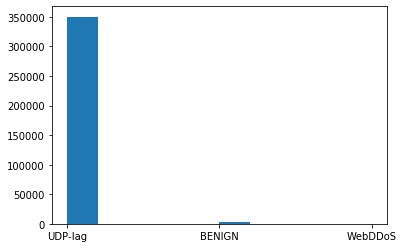

In [0]:
import matplotlib.pyplot as plt
plt.hist(data[' Label'])

In [0]:
len(data[data[' Label']=='WebDDoS'])

439

In [0]:
data1 = data[data[' Label']=='WebDDoS']
data1

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
21193,4517500.0,9.0,6.0,1180.0,2146.0,590.0,0.0,131.111111,260.165546,1073.0,0.0,357.666667,3.320421,322678.571429,1.206997e+06,4516266.0,1.0,4517500.0,564687.500000,1.596679e+06,4516266.0,1.0,1014.0,202.8,2.953044e+02,654.0,1.0,304.0,208.0,1.992252,1.328168,0.0,1073.0,207.875,392.213016,153831.050000,0.0,0.0,221.733333,131.111111,357.666667,304.0,9.0,1180.0,6.0,2146.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,WebDDoS
24016,5002555.0,8.0,7.0,1338.0,2146.0,669.0,0.0,167.250000,309.686823,1073.0,0.0,306.571429,2.998468,357325.357143,1.336629e+06,5001305.0,1.0,1250.0,178.571429,2.653048e+02,707.0,1.0,5002446.0,833741.0,2.041733e+06,5001412.0,1.0,272.0,240.0,1.599183,1.399285,0.0,1073.0,217.750,403.248393,162609.266667,0.0,0.0,232.266667,167.250000,306.571429,272.0,8.0,1338.0,7.0,2146.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,WebDDoS
33934,148.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,13513.513514,148.000000,0.000000e+00,148.0,148.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,32.0,32.0,6756.756757,6756.756757,0.0,0.0,0.000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,32.0,1.0,0.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,WebDDoS
33936,100.0,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,30000.000000,50.000000,2.828427e+00,52.0,48.0,0.0,0.000000,0.000000e+00,0.0,0.0,48.0,48.0,0.000000e+00,48.0,48.0,32.0,64.0,10000.000000,20000.000000,0.0,0.0,0.000,0.000000,0.000000,1.0,2.0,0.000000,0.000000,0.000000,32.0,1.0,0.0,2.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,WebDDoS
36036,179.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,11173.184358,179.000000,0.000000e+00,179.0,179.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,32.0,32.0,5586.592179,5586.592179,0.0,0.0,0.000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,32.0,1.0,0.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,WebDDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336087,242.0,4.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,24793.388430,48.400000,6.498307e+01,124.0,1.0,242.0,80.666667,1.379867e+02,240.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,144.0,80.0,16528.925620,8264.462810,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,144.0,4.0,0.0,2.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,WebDDoS
352099,127.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,15748.031496,127.000000,0.000000e+00,127.0,127.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,32.0,32.0,7874.015748,7874.015748,0.0,0.0,0.000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,32.0,1.0,0.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,WebDDoS
352100,118.0,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,25423.728814,59.000000,8.202439e+01,117.0,1.0,0.0,0.000000,0.000000e+00,0.0,0.0,1.0,1.0,0.000000e+00,1.0,1.0,32.0

In [0]:
data2 = data[data[' Label']=='BENIGN']
data2

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
18111,113871580.0,52.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.456655,2.232776e+06,4.066475e+06,9806952.0,1.0,113871580.0,2.232776e+06,4.066475e+06,9806952.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.456655,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000,0.0,52.0,0.0,0.0,0.0,0.0,0.0,6.083333,0.668558,7.0,5.0,9489291.75,213354.995987,9806952.0,9169328.0,0,BENIGN
33360,112936309.0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.345327,2.972008e+06,4.436270e+06,9869393.0,1.0,112936309.0,2.972008e+06,4.436270e+06,9869393.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.345327,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000,0.0,39.0,0.0,0.0,0.0,0.0,0.0,4.916667,0.514929,6.0,4.0,9411353.75,292787.598645,9869393.0,9048974.0,0,BENIGN
34760,24944828.0,8.0,6.0,37.0,0.0,31.0,0.0,4.625000,10.662853,0.0,0.0,0.000,0.561239,1.918833e+06,3.831659e+06,10010175.0,1.0,24944828.0,3.563547e+06,4.764246e+06,10030828.0,1.0,20061598.0,4.012320e+06,5.494092e+06,10031272.0,1.0,160.0,192.0,0.320708,0.240531,0.0,31.0,2.533333,7.890923,6.226667e+01,0.0,0.0,2.714286,4.625000,0.000,160.0,8.0,37.0,6.0,0.0,6.0,20.0,20876.000000,313.955411,21098.0,20654.0,10009953.00,313.955411,10010175.0,10009731.0,0,BENIGN
42700,20779.0,2.0,2.0,86.0,366.0,43.0,43.0,43.000000,0.000000,183.0,183.0,183.000,192.502045,6.926333e+03,1.199157e+04,20773.0,3.0,3.0,3.000000e+00,0.000000e+00,3.0,3.0,3.0,3.000000e+00,0.000000e+00,3.0,3.0,0.0,0.0,96.251023,96.251023,43.0,183.0,99.000000,76.681158,5.880000e+03,0.0,1.0,123.750000,43.000000,183.000,0.0,2.0,86.0,2.0,366.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,BENIGN
42702,118074966.0,36.0,48.0,2474.0,67854.0,517.0,0.0,68.722222,134.701705,3280.0,0.0,1413.625,0.711412,1.422590e+06,9.088148e+06,58925987.0,1.0,118074966.0,3.373570e+06,1.387167e+07,58925987.0,1.0,117997204.0,2.510579e+06,1.202916e+07,59003930.0,1.0,744.0,984.0,0.304891,0.406521,0.0,3280.0,827.388235,1069.190416,1.143168e+06,0.0,1.0,837.238095,68.722222,1413.625,744.0,36.0,2474.0,48.0,67854.0,14.0,20.0,88838.000000,15440.383674,99756.0,77920.0,58909703.50,23028.346543,58925987.0,58893420.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278588,20788.0,2.0,2.0,84.0,116.0,42.0,42.0,42.000000,0.000000,58.0,58.0,58.000,192.418703,6.929333e+03,1.200023e+04,20786.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,40.0,40.0,96.209352,96.209352,42.0,58.0,48.400000,8.763561,7.680000e+01,0.0,1.0,60.500000,42.000000,58.000,40.0,2.0,84.0,2.0,116.0,1.0,20.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,BENIGN
278717,45913.0,2.0,2.0,84.0,116.0,42.0,42.0,42.000000,0.000000,58.0,58.0,58.000,87.121295,1.530433e+04,2.650528e+04,45910.0,1.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,40.0,40.0

In [0]:
data3 = data[data[' Label']=='UDP-lag']
data3

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
6763,119852737.0,284.0,216.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,4.171786e+00,240185.845691,824467.567460,5976468.0,0.0,119852737.0,423507.904594,1.059521e+06,5976562.0,0.0,114512947.0,532618.35814,1.198259e+06,5976606.0,0.0,0.0,0.0,2.369575e+00,1.802212,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,284.0,0.0,216.0,0.0,0.0,0.0,6.880789e+06,4.879616e+06,14023934.0,4023437.0,5976339.0,102.485771,5976468.0,5976197.0,1,UDP-lag
14800,378881.0,2.0,3.0,136.0,104.0,68.0,68.0,68.0,0.000000,52.0,0.0,34.666667,1.319676e+01,94720.250000,189437.833334,378877.0,1.0,2.0,2.000000,0.000000e+00,2.0,2.0,2.0,1.00000,0.000000e+00,1.0,1.0,64.0,96.0,5.278702e+00,7.918053,0.0,68.0,51.333333,26.341349,693.866667,0.0,1.0,61.60,68.0,34.666667,64.0,2.0,136.0,3.0,104.0,1.0,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,UDP-lag
14801,108088.0,4.0,0.0,1438.0,0.0,389.0,330.0,359.5,34.063666,0.0,0.0,0.000000,3.700688e+01,36029.333333,62402.903845,108086.0,1.0,108088.0,36029.333333,6.240290e+04,108086.0,1.0,0.0,0.00000,0.000000e+00,0.0,0.0,80.0,0.0,3.700688e+01,0.000000,330.0,389.0,353.600000,32.315631,1044.300000,0.0,0.0,442.00,359.5,0.000000,80.0,4.0,1438.0,0.0,0.0,3.0,8.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,1,UDP-lag
14802,211671.0,6.0,0.0,2088.0,0.0,393.0,321.0,348.0,35.088460,0.0,0.0,0.000000,2.834588e+01,42334.200000,58036.949258,109859.0,1.0,211671.0,42334.200000,5.803695e+04,109859.0,1.0,0.0,0.00000,0.000000e+00,0.0,0.0,96.0,0.0,2.834588e+01,0.000000,321.0,393.0,344.142857,33.617597,1130.142857,0.0,0.0,401.50,348.0,0.000000,96.0,6.0,2088.0,0.0,0.0,5.0,8.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,1,UDP-lag
14803,990791.0,20.0,0.0,7242.0,0.0,401.0,321.0,362.1,30.127623,0.0,0.0,0.000000,2.018589e+01,52146.894737,56480.679728,112439.0,1.0,990791.0,52146.894737,5.648068e+04,112439.0,1.0,0.0,0.00000,0.000000e+00,0.0,0.0,1042.0,0.0,2.018589e+01,0.000000,321.0,401.0,360.142857,30.703885,942.728571,0.0,0.0,378.15,362.1,0.000000,1042.0,20.0,7242.0,0.0,0.0,19.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,1,UDP-lag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370600,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000e+00,1.0,1.0,0.0,0.00000,0.000000e+00,0.0,0.0,40.0,0.0,2.000000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,40.0,2.0,0.0,0.0,0.0,0.0,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,1,UDP-lag
370601,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000e+00,1.0,1.0,0.0,0.00000,0.000000e+00,0.0,0.0,40.0,0.0,2.000000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,40.0,2.0,0.0,0.0,0.0,0.0,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,1,UDP-lag


In [0]:
data1 = data1.sample(frac = 400/len(data1))
data2 = data2.sample(frac = 400/len(data2))
data3 = data3.sample(frac = 400/len(data3))
print(len(data1), len(data2), len(data3))

400 400 400


In [0]:
data = pd.concat([data1,data2,data3])
len(data)

1200

(array([400.,   0.,   0.,   0.,   0., 400.,   0.,   0.,   0., 400.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

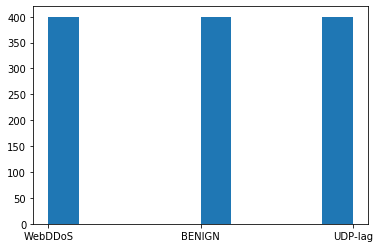

In [0]:
plt.hist(data[' Label'])

In [0]:
import numpy as np
datanp = np.array(data)
print(datanp)
Y = datanp.T[-1].T
datanp = datanp.T[:-2].astype(np.double).T

[[2.0 1.0 2.0 ... 0.0 1 'WebDDoS']
 [5008523.0 8.0 7.0 ... 0.0 1 'WebDDoS']
 [5215956.0 12.0 9.0 ... 0.0 1 'WebDDoS']
 ...
 [0.0 2.0 0.0 ... 0.0 1 'UDP-lag']
 [1.0 2.0 0.0 ... 0.0 1 'UDP-lag']
 [3.0 2.0 0.0 ... 0.0 1 'UDP-lag']]


In [0]:
datanp[~np.isnan(datanp).any(axis=1)]
datanp[~np.isinf(datanp).any(axis=1)]
datanp

array([[2.000000e+00, 1.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.008523e+06, 8.000000e+00, 7.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.215956e+06, 1.200000e+01, 9.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.000000e+00, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [0]:
print(X.shape)
X = np.delete(X,12,1)
X.shape

(1200, 53)


(1200, 52)

In [0]:
np.mean(X,axis=0)

array([6.92785881e+06, 4.40833333e+00, 3.18583333e+00, 4.04247500e+02,
       9.71000833e+02, 1.08741667e+02, 2.13308333e+01, 4.20833940e+01,
       3.46354291e+01, 1.80726667e+02, 1.33725000e+01, 6.59835771e+01,
       3.52427083e+03, 6.58154951e+06, 6.33753906e+05, 1.22542468e+06,
       3.26170965e+06, 2.87651750e+03, 4.04817464e+06, 2.24204100e+05,
       5.87689207e+05, 1.96290789e+06, 1.37250000e+00, 1.04123333e+02,
       8.28300000e+01, 3.68714607e+05, 1.10378726e+04, 2.11958333e+01,
       2.13408333e+02, 5.95325797e+01, 6.25544472e+01, 2.85063673e+04,
       2.99166667e-01, 7.19166667e-01, 7.05749836e+01, 4.20833940e+01,
       6.59835771e+01, 1.04123333e+02, 4.40833333e+00, 4.04247500e+02,
       3.18583333e+00, 9.71000833e+02, 1.09544325e+04, 1.55558583e+03,
       1.29750000e+00, 2.42325000e+01, 3.85322464e+04, 1.60112182e+04,
       5.84702250e+04, 2.69320450e+04, 2.72958320e+06, 2.07639627e+05])

In [0]:
Y

array(['WebDDoS', 'WebDDoS', 'WebDDoS', ..., 'UDP-lag', 'UDP-lag',
       'UDP-lag'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [0]:
xtrain = (xtrain-np.mean(xtrain,axis=0))/np.std(xtrain,axis=0)
xtest = (xtest-np.mean(xtest,axis=0))/np.std(xtest,axis=0)

In [0]:
np.std(xtrain,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [0]:
data.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,6.325636e+06,4.459167,3.066667,359.356667,1091.937500,109.855833,27.173333,46.863791,33.388373,206.875000,15.628333,76.681682,inf,5.624655e+05,1.138858e+06,3.397995e+06,3.166637e+03,5.970934e+06,6.470846e+05,1.216904e+06,3.116575e+06,2.460954e+03,3.257144e+06,1.894097e+05,4.948024e+05,1.667949e+06,1.434167,106.675000,82.346667,3.540222e+05,12372.725184,26.296667,234.807500,67.825322,68.397100,3.264153e+04,0.277500,0.681667,80.481328,46.863791,76.681682,106.675000,4.459167,359.356667,3.066667,1091.937500,1.217500,25.447500,2.846633e+04,8.160305e+03,4.278636e+04,2.417294e+04,2.532022e+06,1.891582e+05,2.695225e+06,2.383117e+06,0.608333
std,2.038298e+07,8.691449,8.826408,989.382669,8904.382248,245.337731,123.102024,129.839093,84.466186,559.856598,43.957883,185.181133,NaN,1.705355e+06,3.055795e+06,9.700320e+06,8.532108e+04,2.042409e+07,1.888521e+06,3.461093e+06,9.722316e+06,8.514615e+04,1.708640e+07,8.989049e+05,2.295662e+06,8.299254e+06,4.142258,200.666631,201.978107,7.295214e+05,88681.418607,116.690092,567.777989,153.679926,167.292223,1.199116e+05,0.447952,0.825165,198.871411,129.839093,185.181133,200.666631,8.691449,989.382669,8.826408,8904.382248,3.549511,34.074132,3.550832e+05,1.058003e+05,4.606775e+05,3.509431e+05,9.162083e+06,1.271576e+06,9.582580e+06,8.916648e+06,0.488326
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.103721e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.900000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.679210e+01,3.300000e+01,0.000000e+00,4.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,32.000000,0.000000,1.076320e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000

In [0]:
xtrain.shape

(960, 52)

In [0]:
ytrain.shape

(960,)

In [0]:
xtest.shape

(240, 52)

In [0]:
ytest.shape

(240,)

In [0]:
#np.save('drive/"My Drive"/"Industry Session"/DDos_xtrain.npy',xtrain)
np.save('DDos_xtrain.npy',xtrain)
np.save('DDos_ytrain.npy',ytrain)
np.save('DDos_xtest.npy',xtest)
np.save('DDos_ytest.npy',ytest)

In [0]:
!ls drive/"My Drive"/"Industry Session"

 CSV-01-12.zip	'Neural Networks.ipynb'  'Preprocessing DDOS dataset'
